In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [16]:
from sklearn.datasets import make_classification
import pandas as pd

# Simulate dataset with 8 medical features
X, y = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    weights=[0.85, 0.15],  # simulate imbalance
    random_state=42
)

# Convert to DataFrame for easy inspection
columns = ['age', 'cholesterol', 'blood_pressure', 'max_heart_rate', 'blood_sugar',
           'electro_result', 'exercise_angina', 'oldpeak']
data = pd.DataFrame(X, columns=columns)
data['has_disease'] = y

# Show first few rows
data.head()


,age,cholesterol,blood_pressure,max_heart_rate,blood_sugar,electro_result,exercise_angina,oldpeak,has_disease
0,0.243847,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0
1,0.650237,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0
2,-3.390672,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1
3,-0.884536,-1.753849,-0.723131,3.966151,1.768521,0.155163,-0.331125,1.551561,0
4,0.438060,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0


In [20]:
from sklearn.datasets import make_classification
import pandas as pd

# Simulate dataset with 8 medical features
X, y = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    weights=[0.85, 0.15],  # simulate class imbalance
    random_state=42
)

# Feature columns based on typical medical inputs
columns = ['age', 'cholesterol', 'blood_pressure', 'max_heart_rate', 
           'blood_sugar', 'electro_result', 'exercise_angina', 'oldpeak']

# Create DataFrame
data = pd.DataFrame(X, columns=columns)
data['has_disease'] = y

# Preview the data
data.head()



,age,cholesterol,blood_pressure,max_heart_rate,blood_sugar,electro_result,exercise_angina,oldpeak,has_disease
0,0.243847,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0
1,0.650237,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0
2,-3.390672,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1
3,-0.884536,-1.753849,-0.723131,3.966151,1.768521,0.155163,-0.331125,1.551561,0
4,0.438060,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0


In [22]:
# Separate features and target
X = data.drop("has_disease", axis=1)
y = data["has_disease"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


Class weights: {0: 0.591715976331361, 1: 3.225806451612903}


In [28]:
# Build a simple ANN
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification → sigmoid
])


C:\SHADAB\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [32]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6268 - loss: 0.6111 - val_accuracy: 0.6375 - val_loss: 0.6518
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6760 - loss: 0.5727 - val_accuracy: 0.6687 - val_loss: 0.6250
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6805 - loss: 0.5611 - val_accuracy: 0.6750 - val_loss: 0.6036
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7396 - loss: 0.5322 - val_accuracy: 0.7063 - val_loss: 0.5815
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7495 - loss: 0.5266 - val_accuracy: 0.7188 - val_loss: 0.5587
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7682 - loss: 0.4908 - val_accuracy: 0.7312 - val_loss: 0.5395
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7629 - loss: 0.4633 - val_accuracy: 0.7312 - val_loss: 0.5205
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7880 - loss: 0.4293 - val_accuracy: 0.7250 - v

In [33]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8833 - loss: 0.2456 
Test Accuracy: 0.8800


In [34]:
# Example: predict for the first 5 test samples
predictions = (model.predict(X_test_scaled[:5]) > 0.5).astype("int")
print("Predictions:", predictions.flatten())
print("Actual     :", y_test.values[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Predictions: [1 0 0 0 0]
Actual     : [1 0 0 0 0]


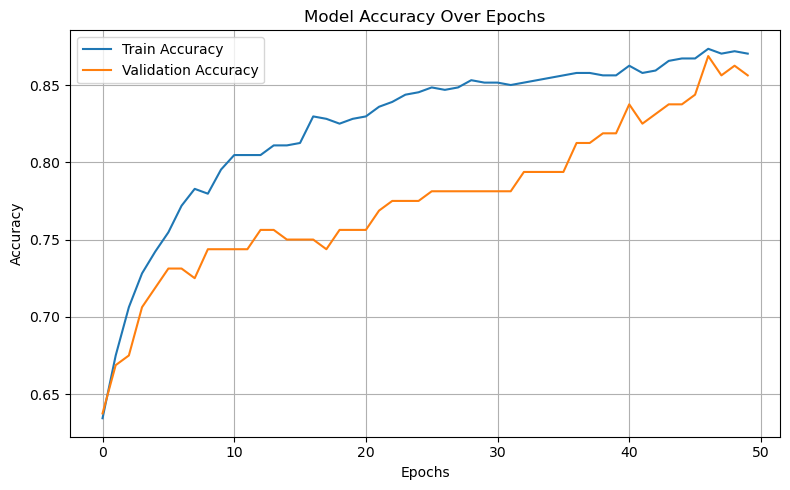

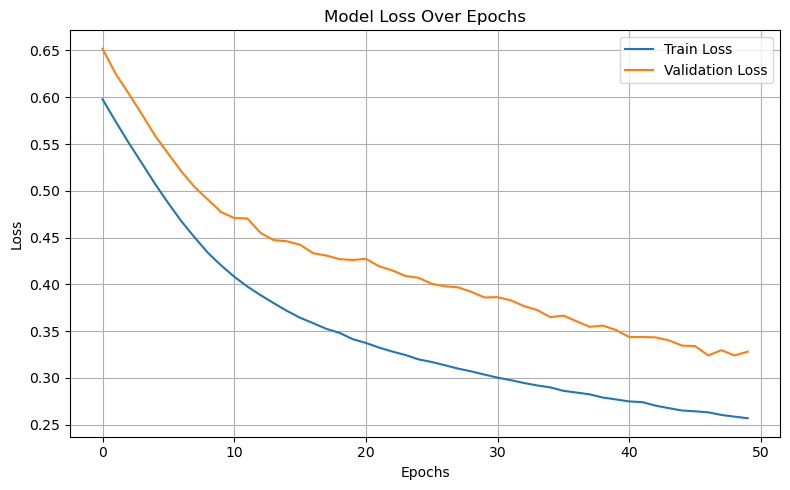

In [38]:
import matplotlib.pyplot as plt

# Visualize training history
def create_visual_report(history):
    # Accuracy plot
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("heart_ann_accuracy.png")
    plt.show()

    # Loss plot
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("heart_ann_loss.png")
    plt.show()

# Call the function using your training history
create_visual_report(history)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


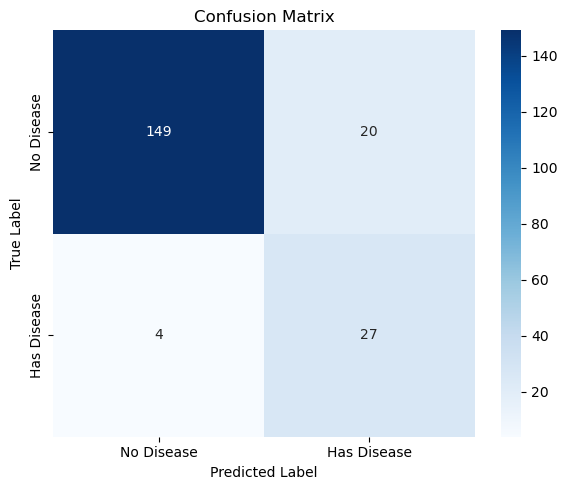

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class labels
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int").flatten()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Has Disease'], yticklabels=['No Disease', 'Has Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("heart_ann_confusion_matrix.png")
plt.show()
